# Linear Algebra and Machine Learning Practice

본 문서는 선형대수학과 머신러닝의 핵심 개념을 다루는 통합 실습 코드입니다.
아래의 순서로 구성되어 있습니다:
1.  **벡터와 행렬 (Vectors and Matrices)**: 데이터 표현의 기본 단위인 벡터와 행렬의 개념, 연산, 기하학적 의미를 학습합니다.
2.  **K-means 클러스터링 (K-means Clustering)**: 대표적인 비지도 학습 알고리즘인 K-means의 원리를 이해하고, 실제 데이터에 적용해봅니다.
3.  **행렬 분해와 선형 시스템 (Matrix Decomposition & Linear Systems)**: Cholesky, QR 분해를 통해 선형 시스템의 해를 구하는 방법을 학습합니다.
4.  **주성분 분석 (Principal Component Analysis, PCA)**: 대표적인 차원 축소 기법인 PCA의 원리를 단계별로 구현하고, 고차원 데이터에 적용해봅니다.

### 데이터 파일 준비: `mnist.npz` 다운로드

본 실습에서는 MNIST 숫자 데이터셋(`mnist.npz`)을 사용합니다.
Google Colab과 같은 원격 환경이나, 로컬에 `mnist.npz` 파일이 없는 경우 아래 코드를 실행하여 GitHub 저장소에서 파일을 자동으로 다운로드할 수 있습니다.

일반적으로 Colab 환경에서는 `!wget` 명령어를 사용하여 파일을 다운로드하지만, 여기서는 Python 기본 라이브러리를 사용하여 더 안정적인 방법으로 구현합니다.

In [1]:
import os
import urllib.request
import numpy as np

# --- 데이터 파일 다운로드 ---
# 다운로드할 파일 정보
npz_filename = "mnist.npz"
# GitHub 리포지토리의 raw content URL
npz_url = "https://raw.githubusercontent.com/jonggul2/linear-algebra-practice/main/mnist.npz"

# 파일이 이미 있는지 확인하고, 없으면 다운로드합니다.
if not os.path.exists(npz_filename):
    print(f"'{npz_filename}' 파일을 다운로드합니다...")
    try:
        urllib.request.urlretrieve(npz_url, npz_filename)
        print("다운로드 완료!")
    except Exception as e:
        print(f"다운로드 중 오류가 발생했습니다: {e}")
        print("실습 진행에 필요한 파일이므로, 수동으로 다운로드 받아주세요.")
        print(f"URL: {npz_url}")
else:
    print(f"'{npz_filename}' 파일이 이미 존재합니다. 다운로드를 건너뜁니다.")

# 다운로드된 파일 확인
try:
    with np.load(npz_filename) as data:
        print(f"'{npz_filename}' 파일 로드 성공. 포함된 배열: {data.files}")
except Exception as e:
    print(f"'{npz_filename}' 파일 로드 중 오류 발생: {e}")

'mnist.npz' 파일이 이미 존재합니다. 다운로드를 건너뜁니다.
'mnist.npz' 파일 로드 성공. 포함된 배열: ['X', 'y']


### 준비하기: 라이브러리 설치 및 불러오기

본 실습에서는 데이터 분석과 과학 계산에 필요한 모든 라이브러리를 한 번에 설치하고 불러옵니다.

In [2]:
# 라이브러리 설치
import subprocess
import sys

def install_if_not_exists(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# 모든 실습에 필요한 라이브러리 목록
required_packages = ["numpy", "matplotlib", "scipy", "sklearn", "pandas"]
for package in required_packages:
    install_if_not_exists(package)


# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles

# 전체 실습의 재현성을 위해 랜덤 시드를 고정합니다.
np.random.seed(0)

---
# Part 1: 벡터와 행렬 (Vectors and Matrices)
---

벡터는 크기와 방향을 함께 가지는 양으로, 숫자를 순서대로 나열한 것입니다.
머신러닝에서는 데이터를 표현하는 가장 기본적인 단위로 사용됩니다.

### 1.1. 벡터 생성과 기본 속성

#### 기본 벡터 생성하기
`np.array()` 함수에 리스트를 전달하여 간단하게 벡터(1차원 배열)를 만들 수 있습니다.

In [3]:
# 실습: 아래 벡터의 값들을 다른 숫자로 바꾸고 실행해보세요.
a = np.array([1, 2, 3])
b = np.array([10, 20, 30, 40])
print("벡터 a:", a)
print("벡터 b:", b)

벡터 a: [1 2 3]
벡터 b: [10 20 30 40]


#### 벡터의 속성 확인하기
- `.shape`: 벡터의 크기(몇 개의 요소가 있는지)를 알려줍니다.
- `.size`: 벡터에 포함된 총 요소의 개수를 알려줍니다. 1차원 벡터에서는 `.shape`의 값과 동일합니다.

In [4]:
# 실습: 위에서 정의한 a, b 벡터의 속성을 확인합니다.
print("a의 형태(크기):", a.shape)
print("a의 요소 개수:", a.size)
print("---")
print("b의 형태(크기):", b.shape)
print("b의 요소 개수:", b.size)

a의 형태(크기): (3,)
a의 요소 개수: 3
---
b의 형태(크기): (4,)
b의 요소 개수: 4


#### 특정 요소에 접근하기 (Indexing)
벡터의 개별 요소에 접근할 때는 인덱싱을 사용합니다. **Python에서는 인덱스가 0부터 시작**한다는 점을 기억하세요!

In [5]:
# 실습: a 벡터의 인덱스 1에 접근합니다.
print(f"a[1]: {a[1]}")

# 실습: b 벡터의 인덱스 2에 접근합니다.
print(f"b[2]: {b[2]}")

a[1]: 2
b[2]: 30


#### 특별한 형태의 벡터 만들기
때로는 모든 요소가 0 또는 1로 채워진 벡터가 필요합니다.
- `np.zeros()`: 영 벡터(모든 요소가 0)를 생성합니다.
- `np.ones()`: 일 벡터(모든 요소가 1)를 생성합니다.

In [6]:
# 실습: 크기가 4인 영 벡터와 크기가 3인 일 벡터를 만들어보세요.
# 모든 요소가 0인 벡터를 생성합니다.
zero_vec = np.zeros(4)
print("영 벡터 (zeros):\n", zero_vec)
print("-" * 20)

# 모든 요소가 1인 벡터를 생성합니다.
ones_vec = np.ones(3)
print("1 벡터 (ones):\n", ones_vec)

영 벡터 (zeros):
 [0. 0. 0. 0.]
--------------------
1 벡터 (ones):
 [1. 1. 1.]


### 1.2. 벡터의 기본 연산

#### 덧셈과 뺄셈
크기(차원)가 같은 두 벡터는 서로 더하거나 뺄 수 있습니다.

In [7]:
# 실습: 아래 v1과 v2의 값을 다른 숫자로 바꾸고, 덧셈/뺄셈 결과와 그래프가 어떻게 변하는지 관찰해보세요.
v1 = np.array([2, 4])
v2 = np.array([4, 1])

# 덧셈
v_add = v1 + v2
print(f"v1 + v2 = {v1} + {v2} = {v_add}")

# 뺄셈
v_sub = v1 - v2
print(f"v1 - v2 = {v1} - {v2} = {v_sub}")

v1 + v2 = [2 4] + [4 1] = [6 5]
v1 - v2 = [2 4] - [4 1] = [-2  3]


#### 덧셈 시각화하기
벡터의 연산은 기하학적으로 표현할 수 있습니다. 벡터 `v1`과 `v2`의 덧셈은 **'꼬리-머리 이어붙이기'(Tip-to-Tail)** 방식으로 시각화됩니다.
- `v1` 벡터의 머리(끝점)에 `v2` 벡터의 꼬리(시작점)를 이어 붙이면, 그 결과는 원점에서 `v2`의 새로운 머리까지의 벡터 `v1 + v2`와 같습니다.

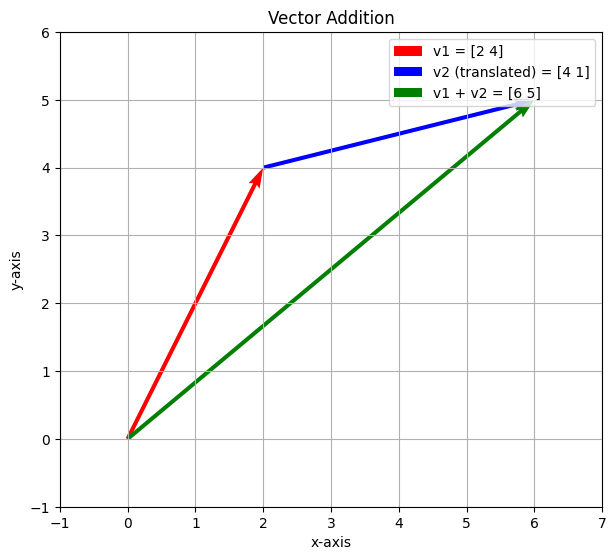

In [8]:
# 원점 (Origin)
origin = np.array([0, 0])

# 그래프에 표시될 모든 점들을 모아 축의 범위를 동적으로 설정합니다.
all_points_x = [0, v1[0], v_add[0]]
all_points_y = [0, v1[1], v_add[1]]


plt.figure(figsize=(7,7))
# v1 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label=f'v1 = {v1}')
# v2 벡터를 v1의 끝점에서 시작하여 그립니다 (평행이동).
plt.quiver(*v1, *v2, angles='xy', scale_units='xy', scale=1, color='b', label=f'v2 (translated) = {v2}')
# v1 + v2 결과 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v_add, angles='xy', scale_units='xy', scale=1, color='g', label=f'v1 + v2 = {v_add}')


# 동적으로 계산된 범위에 여백을 주어 x, y축 범위를 설정합니다.
plt.xlim(min(all_points_x) - 1, max(all_points_x) + 1)
plt.ylim(min(all_points_y) - 1, max(all_points_y) + 1)

plt.title('Vector Addition')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box') # x, y축의 비율을 동일하게 설정합니다.
plt.show()

#### 뺄셈 시각화하기
벡터 `v1`에서 `v2`를 빼는 것은, `v1`에 `v2`의 반대 방향 벡터(`-v2`)를 더하는 것과 같습니다 (`v1 + (-v2)`).
덧셈과 마찬가지로 '꼬리-머리 이어붙이기' 방식으로 시각화할 수 있습니다.

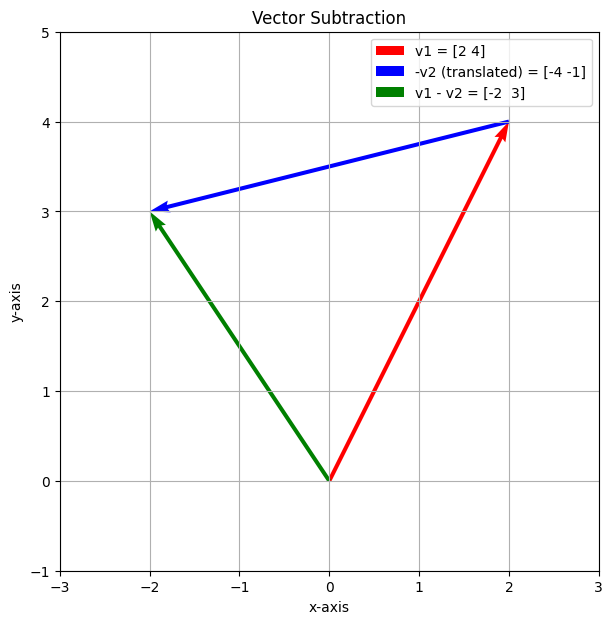

In [9]:
# 원점 (Origin)
origin = np.array([0, 0])
v2_neg = -v2

# 그래프에 표시될 모든 점들을 모아 축의 범위를 동적으로 설정합니다.
all_points_x_sub = [0, v1[0], v_sub[0]]
all_points_y_sub = [0, v1[1], v_sub[1]]

plt.figure(figsize=(7,7))
# v1 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label=f'v1 = {v1}')
# -v2 벡터를 v1의 끝점에서 시작하여 그립니다 (평행이동).
plt.quiver(*v1, *v2_neg, angles='xy', scale_units='xy', scale=1, color='b', label=f'-v2 (translated) = {v2_neg}')
# v1 - v2 결과 벡터를 원점에서 시작하여 그립니다.
plt.quiver(*origin, *v_sub, angles='xy', scale_units='xy', scale=1, color='g', label=f'v1 - v2 = {v_sub}')


# 동적으로 계산된 범위에 여백을 주어 x, y축 범위를 설정합니다.
plt.xlim(min(all_points_x_sub) - 1, max(all_points_x_sub) + 1)
plt.ylim(min(all_points_y_sub) - 1, max(all_points_y_sub) + 1)

plt.title('Vector Subtraction')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box') # x, y축의 비율을 동일하게 설정합니다.
plt.show()

#### 스칼라 곱 (Scalar Multiplication)
스칼라(단일 숫자)를 벡터에 곱하면, 벡터의 모든 요소에 해당 스칼라가 곱해집니다.

In [10]:
# 실습: 스칼라 alpha의 값을 양수, 음수, 0으로 바꿔보며 결과 벡터가 어떻게 변하는지 확인해보세요.
alpha = 3
v = np.array([1, 2, -3])
print(f"{alpha} * {v} = {alpha * v}")

3 * [ 1  2 -3] = [ 3  6 -9]


### 1.3. 벡터의 고급 연산: 선형 결합과 내적

#### 선형 결합 (Linear Combination)
여러 벡터에 스칼라를 곱한 뒤 더하여 새로운 벡터를 만드는 연산입니다.

In [11]:
# 실습: c1, c2의 값을 바꿔보며 선형 결합의 결과가 어떻게 달라지는지 확인해보세요.
a1 = np.array([1, 2])
a2 = np.array([3, 0])

# 스칼라 계수를 정의합니다.
c1 = 2
c2 = -1.5

# a1과 a2 벡터를 스칼라배하여 더합니다.
b_combined = c1 * a1 + c2 * a2
print(f"{c1}*a1 + {c2}*a2 = {b_combined}")

2*a1 + -1.5*a2 = [-2.5  4. ]


#### 내적 (Inner Product / Dot Product)
두 벡터의 각 요소별 곱의 총합입니다. `@` 또는 `np.dot()`으로 계산하며, '가중합' 계산 등에 활용됩니다.

In [12]:
# 실습: a와 b 벡터의 값을 바꿔보며 내적 결과가 어떻게 변하는지 확인해보세요.
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 두 벡터의 내적을 계산합니다.
dot_product = np.dot(a, b)  # 또는 a @ b
print(f"{a} 와 {b} 의 내적: {dot_product}")

[1 2 3] 와 [4 5 6] 의 내적: 32


#### 내적 활용 예시: 총 구매 비용 계산하기
가격 벡터와 수량 벡터의 내적은 총 구매 비용과 같습니다.

In [13]:
# 실습: 가격이나 수량 값을 바꿔서 총 비용을 다시 계산해보세요.
prices = np.array([1500, 3000, 500])
quantities = np.array([2, 1, 3])

# 가격 벡터와 수량 벡터의 내적은 총비용과 같습니다.
total_cost = prices @ quantities
print(f"총 지불 비용: {total_cost}원")

총 지불 비용: 7500원


### 1.4. 벡터의 크기와 거리

#### 놈 (Norm) 계산하기: 벡터의 크기
벡터의 **놈(Norm)** 은 원점(0,0)에서 벡터의 끝점까지의 거리를 의미하며, 보통 벡터의 '크기'나 '길이'를 나타냅니다.
`np.linalg.norm()` 함수를 사용하여 유클리드 놈(L2 Norm)을 계산할 수 있습니다.

In [14]:
# 실습: 벡터 x의 값을 바꿔보며 놈(크기) 값이 어떻게 변하는지 확인해보세요.
# 피타고라스 삼조(3, 4, 5)를 이용한 예시
x = np.array([3, 4])
norm_x = np.linalg.norm(x)
print(f"벡터 x={x} 의 놈(크기): {norm_x}")

벡터 x=[3 4] 의 놈(크기): 5.0


#### 벡터 간의 거리 (Distance)
두 벡터(점) `a`와 `b` 사이의 거리는, 두 벡터의 차(`a - b`)의 놈(크기)과 같습니다.
즉, 한 점에서 다른 점으로 이동하는 벡터의 크기를 계산하는 것과 동일합니다.

In [15]:
# 실습: 벡터 a와 b의 값을 바꿔보며 두 점 사이의 거리가 어떻게 계산되는지 확인해보세요.
a = np.array([1, 2])
b = np.array([4, 6])

# 두 벡터 사이의 유클리드 거리는 두 벡터의 차의 놈과 같습니다.
distance = np.linalg.norm(a - b)
print(f"벡터 a={a} 와 b={b} 사이의 거리: {distance}")

벡터 a=[1 2] 와 b=[4 6] 사이의 거리: 5.0


---
## Part 2: 행렬 (Matrices)
---

행렬은 숫자를 직사각형 격자 형태로 배열한 것으로, 벡터의 확장된 개념입니다.
데이터셋, 연립 방정식, 이미지 등 다양한 형태의 데이터를 표현하며, 데이터를 변환(transformation)하는 역할을 합니다.

### 2.1. 행렬 생성 및 속성

#### Numpy로 행렬 생성하기
`np.array()` 함수에 2차원 리스트를 전달하여 행렬을 생성합니다.

In [16]:
# 실습: 행렬의 값이나 크기를 바꾸고 실행해보세요.
A = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
print("행렬 A:\n", A)

행렬 A:
 [[1 2 3]
 [4 5 6]]


#### 행렬의 속성 확인
- `.shape`: 행렬의 크기를 (행, 열) 형태로 알려줍니다.
- `.ndim`: 행렬의 차원을 알려줍니다. (행렬은 2차원)
- `A[행, 열]`: 특정 위치의 요소에 접근합니다. (인덱스는 0부터 시작)

In [17]:
# 실습: 위에서 정의한 A 행렬의 속성을 확인하고, 특정 요소에 접근해보세요.
print(f"A.shape: {A.shape}")
print(f"A.ndim: {A.ndim}")
# A 행렬의 1행 2열 요소 (0-based-index)에 접근합니다.
print(f"A[0, 2]: {A[0, 2]}")

A.shape: (2, 3)
A.ndim: 2
A[0, 2]: 3


#### 특별한 형태의 행렬 만들기
- `np.zeros((행, 열))`: 모든 요소가 0인 영 행렬을 생성합니다.
- `np.identity(n)`: 주대각선이 1이고 나머지는 0인 `n x n` 크기의 단위 행렬(항등 행렬)을 생성합니다.
- `np.diag([...])`: 리스트를 주대각선 요소로 갖는 대각 행렬을 생성합니다.
- `np.random.rand(행, 열)`: 0과 1 사이의 무작위 값으로 채워진 행렬을 생성합니다.

In [18]:
# 실습: 각 함수의 인자(shape, size 등)를 바꿔서 다양한 특별한 행렬을 만들어보세요.
# 모든 요소가 0인 2x3 행렬을 생성합니다.
Z = np.zeros((2, 3))
print("2x3 영 행렬 (zeros):\n", Z)
print("-" * 20)

# 3x3 단위 행렬을 생성합니다. (주대각선이 1이고 나머지는 0)
I = np.identity(3)
print("3x3 단위 행렬 (identity):\n", I)
print("-" * 20)

# 주대각선에 특정 값을 가지는 대각 행렬을 생성합니다.
D = np.diag([0.2, -3, 1.2])
print("대각 행렬 (diag):\n", D)
print("-" * 20)

# 0과 1 사이의 무작위 값으로 채워진 2x2 행렬을 생성합니다.
R = np.random.rand(2, 2)
print("2x2 랜덤 행렬 (random):\n", R)

2x3 영 행렬 (zeros):
 [[0. 0. 0.]
 [0. 0. 0.]]
--------------------
3x3 단위 행렬 (identity):
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
--------------------
대각 행렬 (diag):
 [[ 0.2  0.   0. ]
 [ 0.  -3.   0. ]
 [ 0.   0.   1.2]]
--------------------
2x2 랜덤 행렬 (random):
 [[0.5488135  0.71518937]
 [0.60276338 0.54488318]]


#### 행렬의 전치 (Transpose)
전치 행렬은 원본 행렬의 행과 열을 서로 맞바꾼 행렬입니다. `.T` 속성으로 간단히 구할 수 있습니다.
(m, n) 크기 행렬의 전치 행렬은 (n, m) 크기가 됩니다.

In [19]:
# 실습: 아래 A 행렬을 전치시키고, 원본과 모양(shape)을 비교해보세요.
A_T = A.T
print("원본 행렬 A:\n", A)
print(f"A.shape: {A.shape}")
print("-" * 20)
print("A의 전치 행렬 A.T:\n", A_T)
print(f"A.T.shape: {A_T.shape}")

원본 행렬 A:
 [[1 2 3]
 [4 5 6]]
A.shape: (2, 3)
--------------------
A의 전치 행렬 A.T:
 [[1 4]
 [2 5]
 [3 6]]
A.T.shape: (3, 2)


### 2.2. 행렬의 기본 연산

#### 덧셈, 뺄셈, 스칼라 곱
벡터와 마찬가지로, 크기가 같은 행렬끼리는 요소별 덧셈과 뺄셈이 가능하며, 스칼라 곱 또한 모든 요소에 적용됩니다.

In [20]:
# 실습: 행렬의 값을 바꾸거나, 스칼라 값을 바꿔서 연산 결과를 확인해보세요.
# 연산을 쉽게 확인하기 위해 간단한 정수 행렬을 새로 정의합니다.
A_add = np.array([
    [10, 20, 30],
    [40, 50, 60]
])
B_add = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

print("행렬 A:\n", A_add)
print("행렬 B:\n", B_add)
print("-" * 20)

# 덧셈
print("A + B:\n", A_add + B_add)
print("-" * 20)

# 뺄셈
print("A - B:\n", A_add - B_add)
print("-" * 20)

# 스칼라 곱
print("2 * A:\n", 2 * A_add)

행렬 A:
 [[10 20 30]
 [40 50 60]]
행렬 B:
 [[1 2 3]
 [4 5 6]]
--------------------
A + B:
 [[11 22 33]
 [44 55 66]]
--------------------
A - B:
 [[ 9 18 27]
 [36 45 54]]
--------------------
2 * A:
 [[ 20  40  60]
 [ 80 100 120]]


### 2.3. 행렬 곱셈과 그 활용

#### 행렬 곱셈 (Matrix-Matrix Multiplication)
두 행렬의 곱셈 `C = AB`는 첫 번째 행렬 `A`의 열 개수와 두 번째 행렬 `B`의 행 개수가 같아야 가능합니다.
(m, p) 크기 행렬과 (p, n) 크기 행렬을 곱하면 결과는 (m, n) 크기의 행렬이 됩니다.
행렬 곱은 **선형 변환의 연속(합성)**을 의미하며, 교환 법칙(`AB != BA`)이 성립하지 않는다는 특징이 있습니다.

In [21]:
# 실습: 두 행렬의 값을 바꿔보거나, 행렬의 크기를 바꿔서 곱셈을 시도해보세요.
# (m, p) x (p, n) 크기의 행렬 곱셈
A_mul = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
B_mul = np.array([
    [10, 11],
    [20, 21],
    [30, 31]
])

# 행렬 곱셈. A_mul의 열 수(3)와 B_mul의 행 수(3)가 같아야 합니다.
C_mul = A_mul @ B_mul  # 결과는 (2, 2) 행렬

print("행렬 A (2x3):\n", A_mul)
print("행렬 B (3x2):\n", B_mul)
print("-" * 20)
print("행렬 곱 AB:\n", C_mul)
print(f"AB의 크기: {C_mul.shape}")

행렬 A (2x3):
 [[1 2 3]
 [4 5 6]]
행렬 B (3x2):
 [[10 11]
 [20 21]
 [30 31]]
--------------------
행렬 곱 AB:
 [[140 146]
 [320 335]]
AB의 크기: (2, 2)


#### 벡터의 외적 (Outer Product)
두 벡터 `a`(크기 m)와 `b`(크기 n)의 외적은 `m x n` 크기의 행렬을 생성합니다.
`a`의 각 요소와 `b`의 각 요소의 모든 조합을 곱한 행렬로, `np.outer(a, b)`로 계산합니다.
외적은 두 벡터의 상호작용을 행렬로 표현하여, 데이터 분석이나 머신러닝 모델의 가중치 표현 등에서 활용됩니다.

In [22]:
# 실습: a_vec, b_vec의 값이나 크기를 바꿔보며 외적의 결과가 어떻게 변하는지 확인해보세요.
a_vec = np.array([1, 2, 3])
b_vec = np.array([10, 20])

# np.outer() 함수를 사용하여 두 벡터의 외적을 계산합니다.
outer_product = np.outer(a_vec, b_vec)

print("벡터 a:", a_vec)
print("벡터 b:", b_vec)
print("-" * 20)
print("a와 b의 외적 (np.outer(a,b)):\n", outer_product)
print(f"외적 행렬의 크기: {outer_product.shape}")

벡터 a: [1 2 3]
벡터 b: [10 20]
--------------------
a와 b의 외적 (np.outer(a,b)):
 [[10 20]
 [20 40]
 [30 60]]
외적 행렬의 크기: (3, 2)


#### 활용 1: 기하 변환 (Geometric Transformations)
행렬 곱셈은 벡터를 특정 방식으로 변환하는 강력한 도구입니다. 예를 들어, 2D 벡터를 `θ`만큼 **회전**시키는 변환은 아래와 같은 회전 행렬 `R`을 곱하여 수행할 수 있습니다.

```
      [ cos(θ)  -sin(θ) ]
R =   [ sin(θ)   cos(θ) ]
```

`변환된 벡터 = R @ 원본 벡터`

In [23]:
# 실습: 벡터 v의 값이나, 회전 각도 theta를 바꿔서 변환 결과를 확인해보세요.
# 변환할 2D 벡터를 정의합니다.
v = np.array([1, 0]) # x축 방향의 단위 벡터

# 45도 회전을 위한 변환 행렬을 생성합니다.
theta = np.radians(45)
R_mat = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# 회전 변환을 적용합니다.
v_rotated = R_mat @ v

print("원본 벡터 v:", v)
print("45도 회전 행렬 R:\n", np.round(R_mat, 2))
print("회전된 벡터 v_rotated:", np.round(v_rotated, 2))

원본 벡터 v: [1 0]
45도 회전 행렬 R:
 [[ 0.71 -0.71]
 [ 0.71  0.71]]
회전된 벡터 v_rotated: [0.71 0.71]


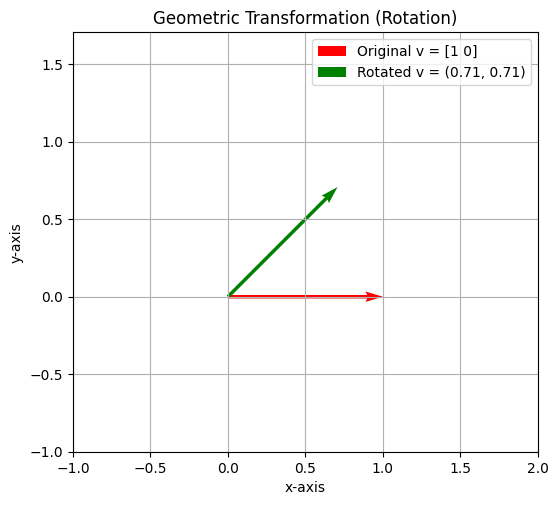

In [24]:
# 시각화
origin = np.array([0, 0])

all_points_x_rot = [0, v[0], v_rotated[0]]
all_points_y_rot = [0, v[1], v_rotated[1]]

plt.figure(figsize=(6,6))
plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='r', label=f'Original v = {v}')
plt.quiver(*origin, *v_rotated, angles='xy', scale_units='xy', scale=1, color='g', label=f'Rotated v = ({v_rotated[0]:.2f}, {v_rotated[1]:.2f})')

# 동적으로 계산된 범위에 여백을 주어 x, y축 범위를 설정합니다.
plt.xlim(min(all_points_x_rot) - 1, max(all_points_x_rot) + 1)
plt.ylim(min(all_points_y_rot) - 1, max(all_points_y_rot) + 1)

plt.title('Geometric Transformation (Rotation)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#### 활용 2: 선형 변환의 합성 (Composition)
두 가지 선형 변환을 연속으로 적용하는 것은, 각 변환에 해당하는 두 행렬을 먼저 곱하여 얻은 **합성 행렬**을 한 번 적용하는 것과 같습니다.
예를 들어, 30도 회전 후 60도 회전을 적용하는 것은, 90도 회전 행렬을 한 번 적용하는 것과 동일합니다.

`(R_60 @ R_30) @ v = R_60 @ (R_30 @ v)`

In [25]:
# 실습: 벡터 v_comp의 값이나, 두 회전 각도를 바꿔보며 결과를 확인해보세요.
# 원본 벡터를 정의합니다.
v_comp = np.array([2, 1])

# 30도 회전 변환
theta_30 = np.radians(30)
R_30 = np.array([[np.cos(theta_30), -np.sin(theta_30)],
                 [np.sin(theta_30),  np.cos(theta_30)]])

# 60도 회전 변환
theta_60 = np.radians(60)
R_60 = np.array([[np.cos(theta_60), -np.sin(theta_60)],
                 [np.sin(theta_60),  np.cos(theta_60)]])

# 방법 1: 변환을 순차적으로 적용합니다 (30도 회전 후 60도 회전).
v_rotated_seq = R_60 @ (R_30 @ v_comp)

# 방법 2: 변환 행렬을 먼저 곱하여 합성한 후, 한 번에 적용합니다.
R_90 = R_60 @ R_30
v_rotated_combined = R_90 @ v_comp

print("원본 벡터:", v_comp)
print("-" * 20)
print(f"순차 변환 결과 (30도 -> 60도):\n", np.round(v_rotated_seq, 2))
print(f"합성 변환 결과 (90도):\n", np.round(v_rotated_combined, 2))

원본 벡터: [2 1]
--------------------
순차 변환 결과 (30도 -> 60도):
 [-1.  2.]
합성 변환 결과 (90도):
 [-1.  2.]


### 2.4. 역행렬과 행렬식

#### 역행렬 (Matrix Inverse)
어떤 정방 행렬(square matrix) `A`에 대해, 곱했을 때 단위 행렬(`I`)이 되는 행렬 `B`가 존재한다면, `B`를 `A`의 **역행렬(inverse matrix)**이라 부르고 `A⁻¹`로 표기합니다.

`A @ A⁻¹ = A⁻¹ @ A = I`

역행렬은 어떤 변환을 '되돌리는'(undo) 변환에 해당하며, 연립 방정식을 푸는 데 핵심적인 역할을 합니다.
**모든 정방 행렬이 역행렬을 갖는 것은 아닙니다.**

- `np.linalg.inv()` 함수로 역행렬을 계산할 수 있습니다.

In [26]:
# 실습: 아래 행렬 A_inv_source의 값을 바꿔보며 역행렬을 계산해보세요.
# 역행렬을 계산할 2x2 정방 행렬 정의
A_inv_source = np.array([
    [1, 1],
    [1, 2]
])

# 역행렬 계산
try:
    A_inverse = np.linalg.inv(A_inv_source)
    print("원본 행렬 A:\n", A_inv_source)
    print("-" * 20)
    print("A의 역행렬 A⁻¹:\n", A_inverse)
    print("-" * 20)

    # A @ A⁻¹가 단위 행렬인지 확인 (부동소수점 오차를 고려)
    identity_check = A_inv_source @ A_inverse
    print("A @ A⁻¹ 결과:\n", identity_check)

    # np.allclose()를 이용한 단위 행렬 검증
    is_identity = np.allclose(identity_check, np.identity(2))
    print(f"\n결과가 단위 행렬과 매우 가깝습니까? -> {is_identity}")

except np.linalg.LinAlgError as e:
    print("오류:", e)
    print("이 행렬은 역행렬을 가지지 않습니다 (특이 행렬).")

원본 행렬 A:
 [[1 1]
 [1 2]]
--------------------
A의 역행렬 A⁻¹:
 [[ 2. -1.]
 [-1.  1.]]
--------------------
A @ A⁻¹ 결과:
 [[1. 0.]
 [0. 1.]]

결과가 단위 행렬과 매우 가깝습니까? -> True


#### 행렬식 (Determinant)
행렬식은 정방 행렬이 갖는 고유한 스칼라 값으로, `np.linalg.det()`으로 계산합니다.
기하학적으로 행렬이 변환시키는 공간의 '부피'가 얼마나 변하는지를 나타냅니다.

- **`det(A) ≠ 0`**: 행렬 `A`는 역행렬을 가집니다 (가역 행렬, Invertible).
- **`det(A) = 0`**: 행렬 `A`는 역행렬을 가지지 않습니다 (특이 행렬, Singular).

따라서 행렬식은 역행렬의 존재 여부를 판별하는 중요한 지표입니다.

In [27]:
# 실습: A_inv_source의 행렬식을 계산해보고, 아래 특이 행렬의 행렬식과 비교해보세요.
# 가역 행렬 (Invertible Matrix)
det_A = np.linalg.det(A_inv_source)
print(f"가역 행렬 A:\n{A_inv_source}")
print(f"A의 행렬식: {det_A:.1f}")
print("-" * 20)

# 특이 행렬 (Singular Matrix)
singular_matrix_det_check = np.array([
    [1, 2],
    [2, 4]
])
det_S = np.linalg.det(singular_matrix_det_check)
print(f"특이 행렬 S:\n{singular_matrix_det_check}")
print(f"S의 행렬식: {det_S:.1f}")

가역 행렬 A:
[[1 1]
 [1 2]]
A의 행렬식: 1.0
--------------------
특이 행렬 S:
[[1 2]
 [2 4]]
S의 행렬식: 0.0


#### 역행렬 계산 시도와 특이 행렬
역행렬이 존재하지 않는 **특이 행렬(Singular Matrix)**에 `np.linalg.inv()`를 사용하면 `LinAlgError`가 발생합니다.

In [28]:
# 실습: 특이 행렬에 역행렬 계산을 시도하면 LinAlgError가 발생하는 것을 확인합니다.
singular_matrix = np.array([
    [1, 2],
    [2, 4]
])

print("특이 행렬 B:\n", singular_matrix)
print("-" * 20)

# 역행렬 계산 시도
try:
    B_inverse = np.linalg.inv(singular_matrix)
    print("B의 역행렬:\n", B_inverse)
except np.linalg.LinAlgError as e:
    print("np.linalg.inv(B) 실행 시 오류 발생:")
    print(f"-> {e}")

특이 행렬 B:
 [[1 2]
 [2 4]]
--------------------
np.linalg.inv(B) 실행 시 오류 발생:
-> Singular matrix


---
# Part 2: K-means Clustering
---

### 2.1. K-means 기본 원리

#### 2.1.1. 기본 원리 학습용 데이터 생성 및 시각화
K-means 알고리즘을 시각적으로 이해하기 위해, `make_blobs` 함수를 사용하여 명확하게 구분된 데이터 군집을 생성하고 시각화합니다.

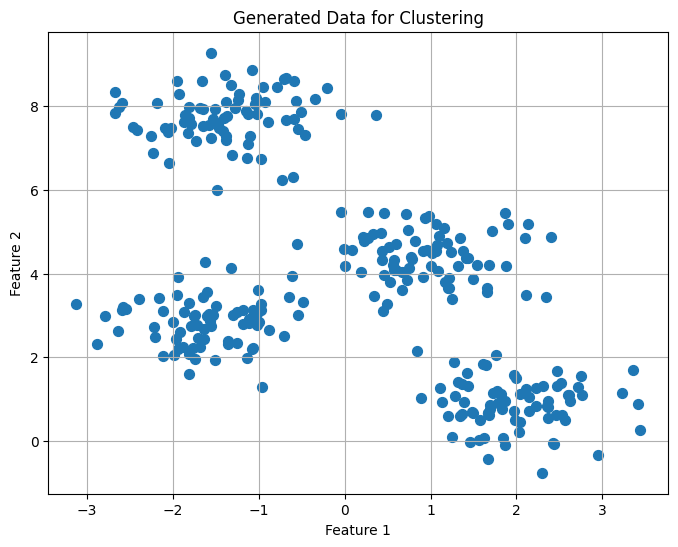

In [29]:
# 실습: n_samples, centers, cluster_std 값을 바꿔보며 데이터 분포가 어떻게 변하는지 확인해보세요.
X_kmeans_blobs, y_kmeans_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X_kmeans_blobs[:, 0], X_kmeans_blobs[:, 1], s=50)
plt.title("Generated Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

#### 2.1.2. K-means 모델 학습 및 결과 시각화
`sklearn.cluster.KMeans`를 사용하여 모델을 학습하고, 군집화 결과를 시각화합니다.
K-means는 각 데이터 포인트를 가장 가까운 군집 중심에 할당하는 방식으로 동작하며, 결과적으로 데이터가 4개의 그룹으로 잘 나뉘는 것을 볼 수 있습니다.

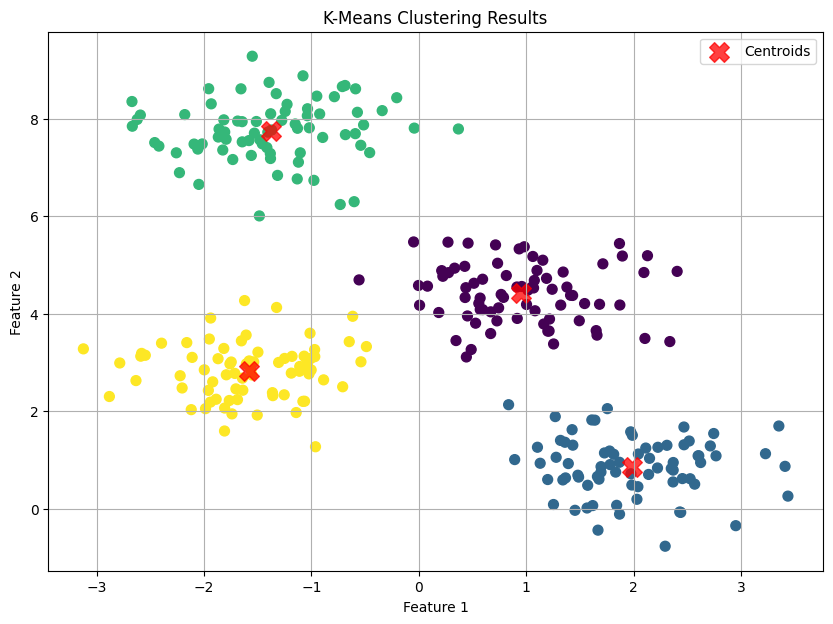

In [30]:
# 실습: n_clusters 값을 실제 클러스터 개수인 4가 아닌 다른 값(예: 3, 5)으로 바꿔보세요.
#       결과가 어떻게 달라지는지 관찰하고, K값 설정의 중요성에 대해 생각해보세요.
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_kmeans_blobs)

plt.figure(figsize=(10, 7))
plt.scatter(X_kmeans_blobs[:, 0], X_kmeans_blobs[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

### 2.2. K-means 적용 사례 (MNIST)

#### 2.2.1. MNIST 데이터에 K-means 적용 및 중심 시각화
실제 데이터인 MNIST 손글씨 숫자 데이터셋에 K-means를 적용합니다. 784차원의 픽셀 데이터를 10개의 클러스터(0~9 숫자)로 그룹화하고, 학습된 각 클러스터의 중심(Centroid)을 시각화합니다.
이는 각 클러스터를 대표하는 '평균적인' 숫자 이미지를 보여줍니다.

**중요**: K-means는 비지도 학습이므로, 클러스터의 레이블(예: 'Cluster 0')이 실제 숫자의 레이블(예: '0')과 일치하지는 않습니다.

데이터 크기: (70000, 784)
Initialization complete
Iteration 0, inertia 4572952.269357938.
Iteration 1, inertia 2913453.5558705223.
Iteration 2, inertia 2847380.866254315.
Iteration 3, inertia 2819924.9856512556.
Iteration 4, inertia 2803563.9923223504.
Iteration 5, inertia 2790858.646935739.
Iteration 6, inertia 2782215.3416035543.
Iteration 7, inertia 2776345.2337436113.
Iteration 8, inertia 2772042.5218316703.
Iteration 9, inertia 2768627.1045753146.
Iteration 10, inertia 2765852.0085039646.
Iteration 11, inertia 2763498.143401716.
Iteration 12, inertia 2761509.1531883166.
Iteration 13, inertia 2759777.060024321.
Iteration 14, inertia 2758316.835477006.
Iteration 15, inertia 2757074.4350083712.
Iteration 16, inertia 2755987.6149655012.
Iteration 17, inertia 2755133.9591106.
Iteration 18, inertia 2754495.8655478805.
Iteration 19, inertia 2753966.0644222777.
Iteration 20, inertia 2753514.9413917237.
Iteration 21, inertia 2753041.19472212.
Iteration 22, inertia 2752552.31005392.
Iteration 23

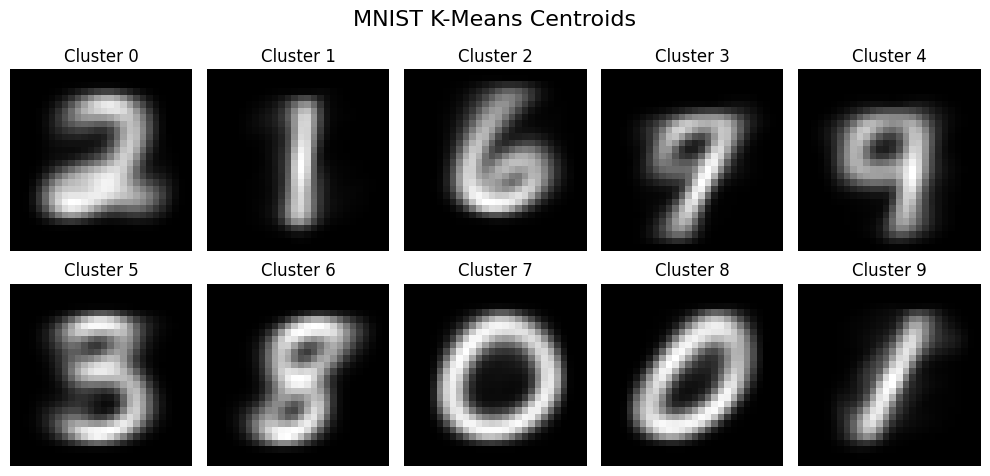

In [31]:
with np.load('mnist.npz') as data:
    X_mnist_kmeans = data['X']
    y_mnist_kmeans = data['y']

print(f"데이터 크기: {X_mnist_kmeans.shape}")

# n_init=1: 1번의 초기값으로 실행합니다.
# verbose=1: 학습 진행 상황을 출력하여 실시간으로 확인합니다.
mnist_kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, random_state=0, verbose=1)
mnist_kmeans.fit(X_mnist_kmeans)

# 클러스터 중심(Centroid) 시각화
centroids_mnist = mnist_kmeans.cluster_centers_

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, centroid in enumerate(centroids_mnist):
    img = centroid.reshape(28, 28)
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].set_title(f'Cluster {i}')
    ax[row, col].axis('off')

plt.suptitle("MNIST K-Means Centroids", fontsize=16)
plt.tight_layout()
plt.show()

### 2.3. K-means의 한계와 피처 변환
K-means는 군집이 구형(spherical)이며, 중심점으로부터의 거리로 잘 구분될 것을 가정합니다.
이 가정이 깨지는 데이터에서는 잘 동작하지 않습니다. 이 한계를 확인하고, 피처 변환을 통해 해결해봅니다.

#### 2.3.1. 실패 사례: 동심원 데이터에 K-means 적용
`make_circles`로 생성된 동심원 데이터에 K-means를 적용하면, 거리 기반 군집화의 한계로 인해 올바르게 분류하지 못합니다.

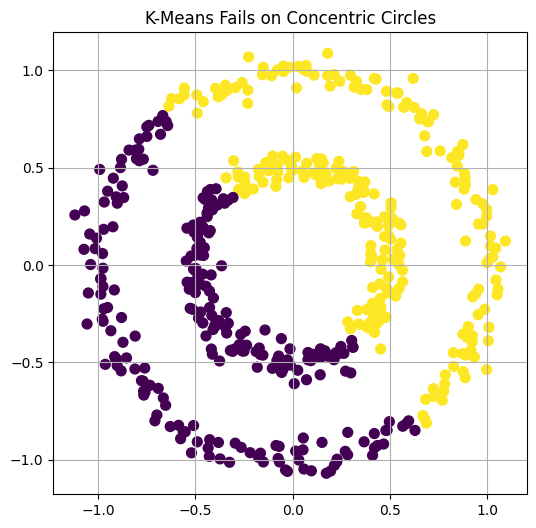

In [32]:
# 동심원 데이터 생성
# 실습: n_samples, factor, noise 값을 바꿔보며 데이터 분포가 어떻게 변하는지 확인해보세요.
X_circles, y_circles = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# 1. 원본 데이터에 K-means 적용 (실패 사례)
kmeans_fail = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_fail = kmeans_fail.fit_predict(X_circles)

plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_fail, s=50, cmap='viridis')
plt.title('K-Means Fails on Concentric Circles')
# 가로, 세로 비율을 동일하게 설정하여 원이 제대로 보이게 합니다.
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

#### 2.3.2. 해결책: 피처 변환 및 K-means 재적용
데이터의 표현 방식을 바꾸어 K-means가 인식할 수 있는 형태로 만들어줍니다. 기존의 (x, y) 직교 좌표계를 **거리(r)**와 **각도(θ)**를 나타내는 **극 좌표계**로 변환합니다.
변환된 좌표계에서는 거리(r) 값만으로도 두 군집이 명확하게 구분되어, K-means가 성공적으로 동작합니다.

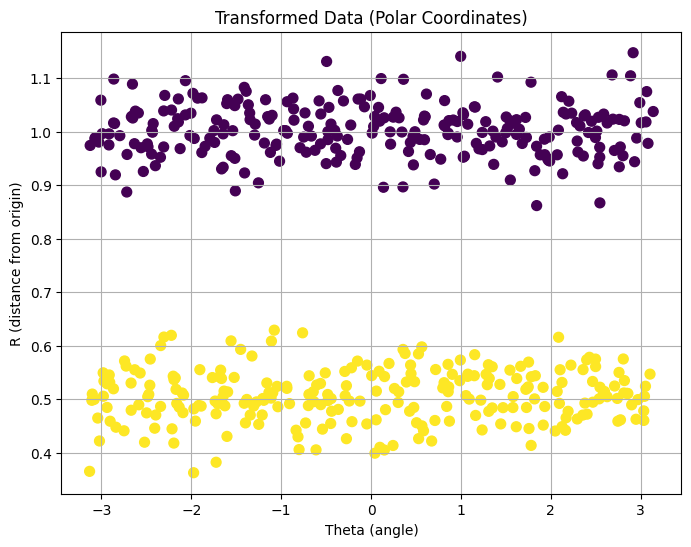

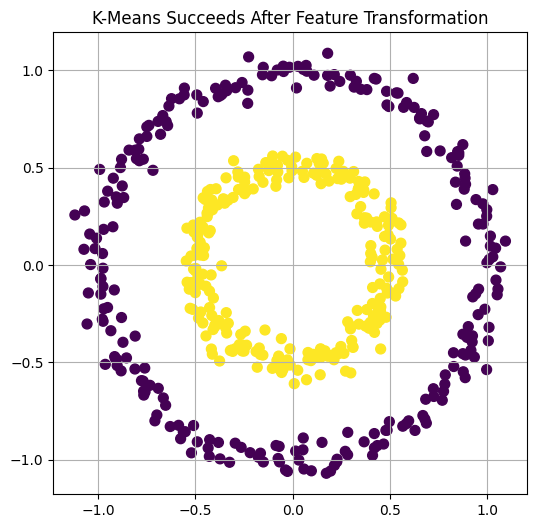

In [33]:
# 2. 피처 변환: 직교 좌표계 -> 극 좌표계
r = np.sqrt(X_circles[:, 0] ** 2 + X_circles[:, 1] ** 2)
theta = np.arctan2(X_circles[:, 1], X_circles[:, 0])

# 변환된 데이터를 시각화하여 구조를 확인합니다.
plt.figure(figsize=(8, 6))
plt.scatter(theta, r, c=y_circles, s=50, cmap='viridis')
plt.title('Transformed Data (Polar Coordinates)')
plt.xlabel('Theta (angle)')
plt.ylabel('R (distance from origin)')
plt.grid()
plt.show()

# 3. 변환된 데이터(거리 r)에 K-means 적용 (성공 사례)
# r.reshape(-1, 1)는 1차원 배열 r을 2차원 열 벡터로 변환합니다.
kmeans_success = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_success = kmeans_success.fit_predict(r.reshape(-1, 1))

# 피처 변환 후 K-means가 성공적으로 분류한 결과를 원본 데이터에 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_success, s=50, cmap='viridis')
plt.title('K-Means Succeeds After Feature Transformation')
# 가로, 세로 비율을 동일하게 설정하여 원이 제대로 보이게 합니다.
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

---
# Part 3: 행렬 분해와 선형 시스템 (Matrix Decomposition & Linear Systems)
---
선형 시스템 `Ax=b`를 푸는 것은 과학과 공학의 여러 분야에서 가장 근본적인 문제 중 하나입니다.
본 실습에서는 행렬 분해(Matrix Decomposition)가 어떻게 이러한 시스템을 효율적이고 안정적으로 해결하는지 알아봅니다.

크게 두 가지 시나리오를 다룹니다:
1.  **해가 유일하게 존재하는 경우**: Cholesky 분해를 사용하여 정확한 해를 구합니다.
2.  **해가 존재하지 않는 경우**: QR 분해를 사용하여 오차를 최소화하는 최적의 근사해(최소제곱 해)를 구합니다.

### 3.1. Cholesky 분해를 이용한 선형 시스템 풀이 (정확한 해)
선형 시스템 `Ax=b`에서 행렬 `A`가 대칭(Symmetric)이면서 양의 정부호(Positive Definite)인 특별한 조건을 만족할 때, Cholesky 분해를 사용하면 매우 효율적으로 해 `x`를 구할 수 있습니다.

#### Cholesky 분해의 원리
- 행렬 `A`를 하삼각행렬(Lower-triangular matrix) `L`과 그 전치 행렬 `L.T`의 곱으로 분해합니다: `A = L @ L.T`
- 이를 원래의 선형 시스템에 대입하면 `(L @ L.T) @ x = b`가 됩니다.
- 문제는 두 개의 더 간단한 선형 시스템으로 나뉩니다.
  1. `L @ y = b` 를 풀어 중간 벡터 `y`를 구합니다. (전방 대입법)
  2. `L.T @ x = y` 를 풀어 최종 해 `x`를 구합니다. (후방 대입법)

이 방식은 역행렬을 직접 구하는 것보다 수치적으로 훨씬 안정적이고 계산 비용이 저렴합니다.

#### 3.1.1. Cholesky 분해 실습
`scipy.linalg.cholesky`를 사용하여 `A`를 분해하고, `scipy.linalg.solve_triangular`를 두 번 사용하여 해 `x`를 구합니다.

In [34]:
# 실습: 아래 행렬 A와 벡터 b의 값을 직접 바꿔보며(A는 대칭 유지), 해가 어떻게 변하는지 확인해보세요.
#      A가 양의 정부호가 아니게 되면(예: A[0,0] = -1) 어떤 오류가 발생하는지도 관찰해보세요.
A_cholesky = np.array([
    [4., 2., 0.],
    [2., 5., 2.],
    [0., 2., 5.]
])
# 이 시스템의 해는 x = [1, 2, 3] 입니다. b는 A @ x의 결과입니다.
b_cholesky = np.array([8., 18., 19.])

print("행렬 A (대칭, 양의 정부호):\n", A_cholesky)
print("\n벡터 b:\n", b_cholesky)

# 1. Cholesky 분해: A = L @ L.T
#    scipy.linalg.cholesky는 기본적으로 하삼각행렬 L을 반환합니다.
try:
    L = scipy.linalg.cholesky(A_cholesky, lower=True)
    print("\n하삼각행렬 L:\n", np.round(L, 2))

    # 2. 첫 번째 시스템 풀이: L @ y = b
    y = scipy.linalg.solve_triangular(L, b_cholesky, lower=True)
    print("\n중간 해 y:\n", np.round(y, 2))

    # 3. 두 번째 시스템 풀이: L.T @ x = y
    x_cholesky = scipy.linalg.solve_triangular(L.T, y, lower=False)
    print("\n최종 해 x (Cholesky):\n", np.round(x_cholesky, 2))

    # 4. 검증: np.linalg.solve와 결과 비교
    x_direct = np.linalg.solve(A_cholesky, b_cholesky)
    print("\n최종 해 x (np.linalg.solve):\n", np.round(x_direct, 2))
    print("\n두 방법의 해가 일치하는가?", np.allclose(x_cholesky, x_direct))

except np.linalg.LinAlgError:
    print("오류: 행렬이 대칭, 양의 정부호가 아닙니다.")

행렬 A (대칭, 양의 정부호):
 [[4. 2. 0.]
 [2. 5. 2.]
 [0. 2. 5.]]

벡터 b:
 [ 8. 18. 19.]

하삼각행렬 L:
 [[2. 0. 0.]
 [1. 2. 0.]
 [0. 1. 2.]]

중간 해 y:
 [4. 7. 6.]

최종 해 x (Cholesky):
 [1. 2. 3.]

최종 해 x (np.linalg.solve):
 [1. 2. 3.]

두 방법의 해가 일치하는가? True


### 3.2. QR 분해를 이용한 최소제곱 문제 풀이 (근사해)
데이터 분석에서 마주하는 많은 문제는 `Ax=b` 형태에서 행렬 `A`의 행의 개수가 열의 개수보다 많은 **Over-determined system**입니다.
이러한 시스템은 일반적으로 정확한 해가 존재하지 않습니다. 대신, 우리는 잔차(residual)의 제곱합 `||Ax - b||²`를 최소화하는 **근사해(approximate solution)** `x̂`를 찾고자 합니다. 이를 **최소제곱(Least Squares) 문제**라고 합니다.

#### QR 분해의 원리
- QR 분해는 행렬 `A`를 직교행렬(Orthogonal matrix) `Q`와 상삼각행렬(Upper-triangular matrix) `R`의 곱으로 표현합니다: `A = Q @ R`
- 이를 최소제곱 문제에 적용하면, 문제는 `R @ x̂ = Q.T @ b` 라는 간단한 선형 시스템으로 변환됩니다.
- `R`이 상삼각행렬이므로, 이 시스템은 후방 대입법으로 쉽게 풀 수 있습니다.

QR 분해는 최소제곱 문제를 푸는 매우 안정적이고 신뢰성 높은 방법입니다.

#### 응용 예제: 2D 데이터 직선 피팅 (Straight-line Fit)
산점도 데이터를 가장 잘 설명하는 직선 `y = c₀ + c₁x`를 찾는 것은 대표적인 최소제곱 문제입니다.
`N`개의 데이터 포인트 `(xᵢ, yᵢ)`가 주어졌을 때, 우리는 다음 식의 오차를 최소화하는 파라미터 `c = [c₀, c₁]`를 찾아야 합니다.

`|| A @ c - y ||²`

여기서,
- `y`는 `[y₁, y₂, ..., yₙ]` 벡터입니다.
- `c`는 `[c₀, c₁]` 벡터 (우리가 찾고자 하는 직선의 절편과 기울기)입니다.
- `A`는 `N x 2` 크기의 설계 행렬(Design Matrix)로, 첫 번째 열은 1(절편용), 두 번째 열은 x 데이터로 구성됩니다.
  ```
      [ 1  x₁ ]
  A = [ 1  x₂ ]
      [ :  :  ]
      [ 1  xₙ ]
  ```

#### 3.2.1. 최소제곱 직선 피팅 실습
QR 분해를 사용하여 주어진 데이터에 가장 잘 맞는 직선의 파라미터를 찾고, 결과를 시각화합니다.

설계 행렬 A의 크기: (6, 2)
Q 행렬의 크기: (6, 2)
R 행렬의 크기: (2, 2)

--- 찾은 파라미터 vs 실제 파라미터 ---
           |  찾은 값   |  실제 값  
------------------------------------
절편 (c₀)  |  2.74   |  2.00  
기울기 (c₁) |  2.84   |  3.00  


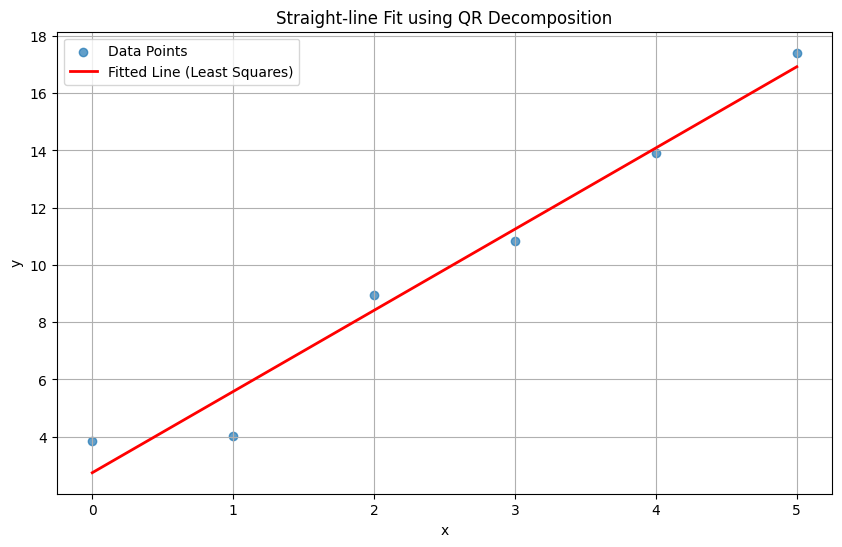

In [35]:
# 실습: true_c0, true_c1 값을 바꾸거나, 노이즈의 강도(아래 normal 함수의 세 번째 인자)를 바꿔보며 직선 피팅이 어떻게 변하는지 관찰해보세요.
# 1. 직선 피팅을 위한 간단한 데이터 생성
true_c0 = 2.0  # y-절편
true_c1 = 3.0  # 기울기

# 실습: 생성할 데이터 포인트 개수를 바꿔보세요.
num_data_points = 6
x_data = np.arange(num_data_points)
# x_data = np.array([0, 1, 2, 3, 4, 5])

noise = np.random.normal(0, 1.0, size=x_data.shape)
y_data = true_c0 + true_c1 * x_data + noise

# 2. 최소제곱 문제를 위한 설계 행렬 A와 벡터 y 구성
#    np.vstack([...]).T 또는 np.c_[...]를 사용하여 열을 합칩니다.
A_fit = np.c_[np.ones(x_data.shape[0]), x_data]
print("설계 행렬 A의 크기:", A_fit.shape)

# 3. QR 분해 수행
Q, R = np.linalg.qr(A_fit)
print("Q 행렬의 크기:", Q.shape)
print("R 행렬의 크기:", R.shape)

# 4. R @ c_hat = Q.T @ y_data 풀기
QTb = Q.T @ y_data
c_hat = scipy.linalg.solve_triangular(R, QTb, lower=False)

print("\n--- 찾은 파라미터 vs 실제 파라미터 ---")
print(f"           | {'찾은 값':^7s} | {'실제 값':^7s}")
print("------------------------------------")
print(f"절편 (c₀)  | {c_hat[0]:^7.2f} | {true_c0:^7.2f}")
print(f"기울기 (c₁) | {c_hat[1]:^7.2f} | {true_c1:^7.2f}")

# 5. 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data Points', alpha=0.7)
plt.plot(x_data, c_hat[0] + c_hat[1] * x_data, color='red', linewidth=2, label='Fitted Line (Least Squares)')
plt.title('Straight-line Fit using QR Decomposition')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

---
# Part 4: 주성분 분석 (Principal Component Analysis, PCA)
---
차원 축소(Dimensionality Reduction)는 데이터의 본질적인 구조는 최대한 유지하면서, 데이터를 표현하는 변수(차원)의 수를 줄이는 기술입니다.
고차원 데이터에서 불필요한 노이즈를 제거하고, 시각화를 용이하게 하며, 머신러닝 모델의 학습 속도를 높이는 등 다양한 이점을 가집니다.

**주성분 분석(Principal Component Analysis, PCA)**은 가장 널리 사용되는 차원 축소 기법 중 하나로, 데이터의 분산(variance)이 가장 큰 방향을 새로운 좌표축(주성분)으로 설정하여 데이터를 선형 변환하는 방식입니다.

본 실습에서는 다음 두 가지를 학습합니다.
1.  **PCA 알고리즘의 단계별 구현**: 2차원 예제 데이터를 통해 PCA의 각 단계를 직접 구현하며 원리를 이해합니다.
2.  **고차원 데이터 적용**: MNIST 손글씨 이미지 데이터에 PCA를 적용하여 차원 축소의 효과와 응용을 확인합니다.

### 4.1. PCA 알고리즘 단계별 구현 (2D 예제)
단순한 2차원 데이터를 통해 PCA가 작동하는 각 단계를 명확하게 이해하는 데 초점을 맞춥니다.

#### 4.1.1. 데이터 생성 및 시각화
두 변수 간에 강한 양의 상관관계가 있는 2차원 데이터셋을 생성하고, 산점도(scatter plot)를 통해 데이터의 분포 방향을 확인합니다.

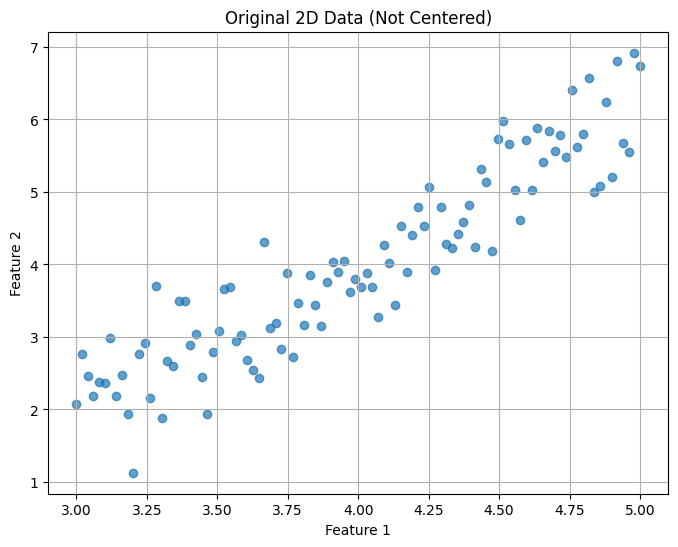

In [36]:
# 실습: x와 y의 관계(예: y = -2 * x)나 노이즈의 크기를 바꿔보며 데이터 분포가 어떻게 변하는지 확인해보세요.
num_samples = 100
# 원점에서 의도적으로 벗어난 데이터를 생성하여, 평균 중심화의 효과를 명확히 보여줍니다.
x_pca_2d = np.linspace(3, 5, num_samples)
y_pca_2d = 2 * x_pca_2d - 4 + np.random.normal(0, 0.5, num_samples)
data_2d = np.array([x_pca_2d, y_pca_2d]).T

plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.7)
plt.title("Original 2D Data (Not Centered)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

#### 4.1.2. 데이터 전처리: 평균 중심화 (Mean Centering)
PCA는 데이터의 분산을 기반으로 하므로, 각 변수(feature)의 평균을 0으로 맞추는 것이 필수적입니다.
데이터의 각 축(x, y)에 대해 평균을 계산하고, 모든 데이터 포인트에서 해당 평균을 빼줍니다.

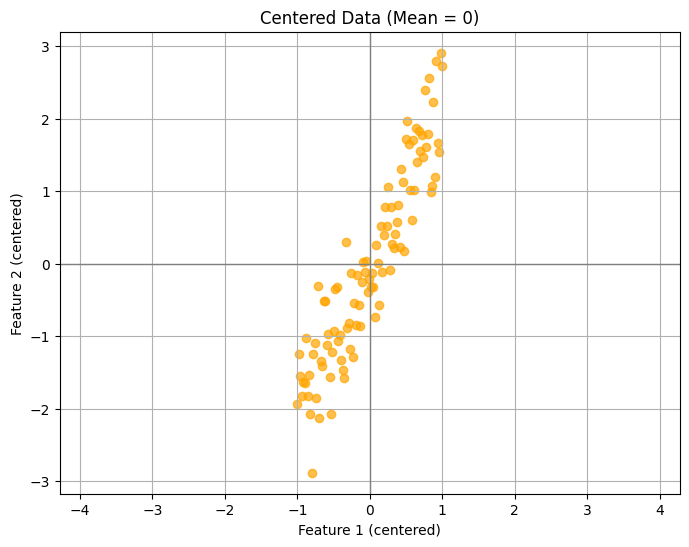

In [37]:
mean_vec = np.mean(data_2d, axis=0)
centered_data = data_2d - mean_vec

plt.figure(figsize=(8, 6))
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, color='orange')
plt.title("Centered Data (Mean = 0)")
plt.xlabel("Feature 1 (centered)")
plt.ylabel("Feature 2 (centered)")
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.axis('equal')
plt.grid(True)
plt.show()

#### 4.1.3. 공분산 행렬 계산 및 고유값 분해
PCA의 핵심은 데이터의 분산이 가장 큰 방향(주성분)을 찾는 것이며, 이는 **공분산 행렬의 고유벡터(eigenvector)**에 해당합니다.
- **공분산 행렬**: 데이터가 각 축을 따라 얼마나 퍼져 있고, 축 간에는 어떤 상관관계를 갖는지 나타내는 행렬입니다.
- **고유값 분해**: 이 공분산 행렬을 고유값(eigenvalue)과 고유벡터로 분해합니다.
  - **고유벡터**: 데이터의 분산이 가장 큰 방향, 즉 **주성분(Principal Components)**이 됩니다.
  - **고유값**: 해당 고유벡터 방향으로 데이터가 가진 분산의 크기를 나타냅니다.

In [38]:
# 1. 공분산 행렬 계산
#    np.cov는 (변수 개수, 샘플 수) 형태의 입력을 기대하므로 전치(.T)가 필요합니다.
cov_matrix = np.cov(centered_data.T)

# 2. 고유값 분해
#    np.linalg.eigh는 대칭 행렬에 사용되며, 고유값을 오름차순으로 정렬하여 반환합니다.
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# 고유값이 큰 순서대로 정렬 (내림차순)
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

print("공분산 행렬:\n", np.round(cov_matrix, 2))
print("\n고유값 (분산 크기):\n", np.round(eigenvalues, 2))
print("\n고유벡터 (주성분 방향):\n", np.round(eigenvectors, 2))
print("\n제1 주성분 (PC1):", np.round(pc1, 2))
print("제2 주성분 (PC2):", np.round(pc2, 2))

공분산 행렬:
 [[0.34 0.71]
 [0.71 1.75]]

고유값 (분산 크기):
 [2.05 0.04]

고유벡터 (주성분 방향):
 [[ 0.39 -0.92]
 [ 0.92  0.39]]

제1 주성분 (PC1): [0.39 0.92]
제2 주성분 (PC2): [-0.92  0.39]


#### 4.1.4. 주성분 시각화 및 데이터 사영
계산된 두 주성분(PC1, PC2)을 데이터 산점도 위에 화살표로 그려, 데이터의 주된 분산 방향과 일치하는지 확인합니다.
그 후, 데이터를 1차원으로 축소하기 위해 중심화된 데이터를 제1 주성분(PC1) 벡터에 **사영(projection)**합니다.

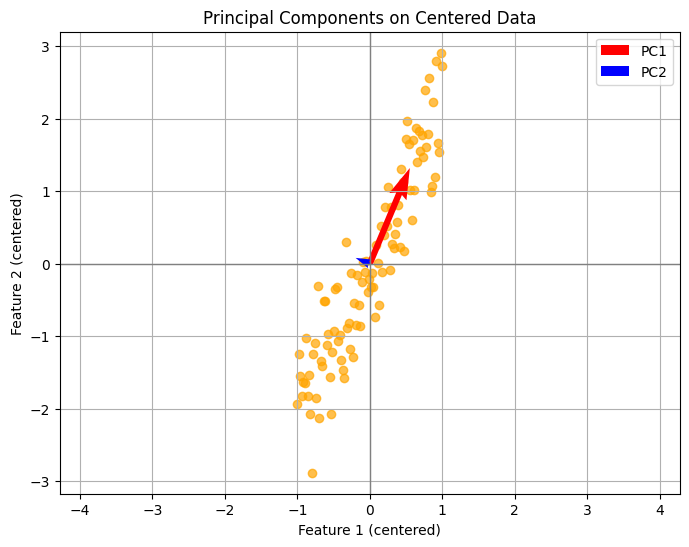

원본 2D 데이터 (첫 5개):
 [[3.   2.07]
 [3.02 2.77]
 [3.04 2.46]
 [3.06 2.18]
 [3.08 2.38]]

중심화된 2D 데이터 (첫 5개):
 [[-1.   -1.94]
 [-0.98 -1.24]
 [-0.96 -1.55]
 [-0.94 -1.83]
 [-0.92 -1.63]]

PC1으로 사영된 1D 데이터 (첫 5개):
 [-2.17 -1.52 -1.8  -2.05 -1.85]


In [39]:
# 주성분 시각화
plt.figure(figsize=(8, 6))
plt.scatter(centered_data[:, 0], centered_data[:, 1], alpha=0.7, color='orange')
# 고유벡터(주성분)를 화살표로 그립니다. 길이는 해당 방향의 분산 크기(고유값의 제곱근)를 반영합니다.
plt.quiver(0, 0, pc1[0] * np.sqrt(eigenvalues[0]), pc1[1] * np.sqrt(eigenvalues[0]),
           color='red', scale_units='xy', scale=1, width=0.01, label='PC1')
plt.quiver(0, 0, pc2[0] * np.sqrt(eigenvalues[1]), pc2[1] * np.sqrt(eigenvalues[1]),
           color='blue', scale_units='xy', scale=1, width=0.01, label='PC2')
plt.title("Principal Components on Centered Data")
plt.xlabel("Feature 1 (centered)")
plt.ylabel("Feature 2 (centered)")
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

# 데이터 사영 (2D -> 1D)
projected_data = centered_data @ pc1
print("원본 2D 데이터 (첫 5개):\n", np.round(data_2d[:5], 2))
print("\n중심화된 2D 데이터 (첫 5개):\n", np.round(centered_data[:5], 2))
print("\nPC1으로 사영된 1D 데이터 (첫 5개):\n", np.round(projected_data[:5], 2))

#### 4.1.5. 데이터 재구성 (Back-projection)
1차원으로 축소된 데이터(`projected_data`)를 다시 2차원 공간으로 되돌리는 과정입니다.
이 과정은 `(1D 데이터) @ (PC1 벡터의 전치)`로 수행할 수 있으며, 결과적으로 모든 데이터 포인트가 제1 주성분(PC1) 직선 위에 놓이게 됩니다.
이는 PCA가 정보의 손실을 감수하고 데이터의 가장 중요한 분산 방향으로 데이터를 '근사'하는 과정을 시각적으로 보여줍니다.

--- 데이터 재구성 계산 과정 (첫 1개 포인트) ---
  - 1D로 축소된 값: -2.17
  - 2D로 재구성된 중심화 좌표: [-0.84 -2.  ]  (계산: -2.17 * [0.39 0.92])
  - 최종 재구성 좌표: [3.16 2.  ]  (계산: [-0.84 -2.  ] + [4.   4.01])


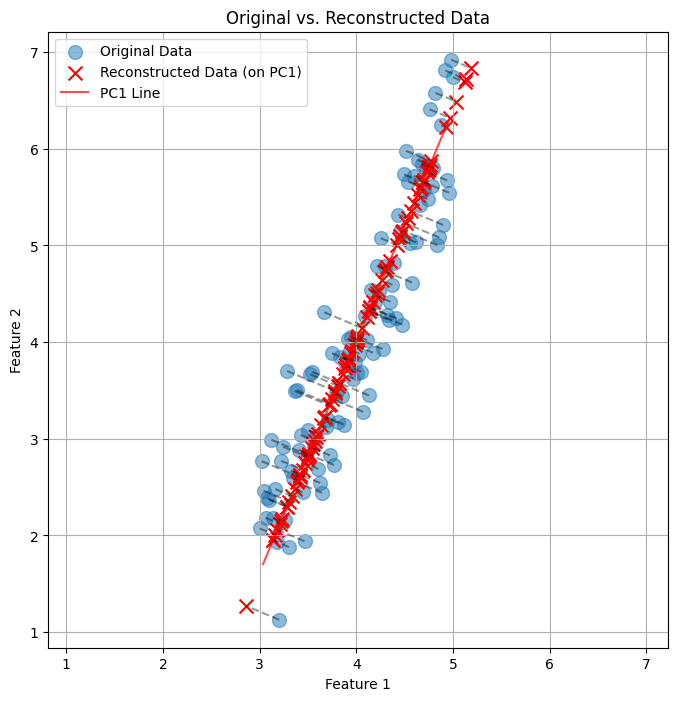

In [40]:
# 1. 1D 데이터를 다시 2D 공간으로 재구성 (중심화된 공간 기준)
#    1D 벡터인 projected_data를 열 벡터로, pc1을 행 벡터로 변환하여 외적(outer product)을 수행합니다.
reconstructed_centered_data = projected_data[:, np.newaxis] @ pc1[np.newaxis, :]

# 2. 원본 데이터 공간으로 이동 (평균을 다시 더해줌)
reconstructed_data = reconstructed_centered_data + mean_vec

# 재구성 결과 출력
print("--- 데이터 재구성 계산 과정 (첫 1개 포인트) ---")
projected_val = projected_data[0]
reconstructed_centered_pt = reconstructed_centered_data[0]
reconstructed_pt = reconstructed_data[0]

print(f"  - 1D로 축소된 값: {projected_val:.2f}")
print(f"  - 2D로 재구성된 중심화 좌표: {np.round(reconstructed_centered_pt, 2)}  (계산: {projected_val:.2f} * {np.round(pc1, 2)})")
print(f"  - 최종 재구성 좌표: {np.round(reconstructed_pt, 2)}  (계산: {np.round(reconstructed_centered_pt, 2)} + {np.round(mean_vec, 2)})")


# 시각화
plt.figure(figsize=(8, 8))
# 원본 데이터
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5, s=100, label='Original Data')
# 재구성된 데이터
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], color='red', marker='x', s=100, label='Reconstructed Data (on PC1)')

# 원본-재구성 연결선 (오차 시각화)
for i in range(len(data_2d)):
    plt.plot([data_2d[i, 0], reconstructed_data[i, 0]], [data_2d[i, 1], reconstructed_data[i, 1]], 'k--', alpha=0.4)

# 주성분 직선 (평균을 고려하여 원본 데이터 공간에 표시)
line_range = np.linspace(-2.5, 2.5, 100)
line_x = line_range * pc1[0] + mean_vec[0]
line_y = line_range * pc1[1] + mean_vec[1]
plt.plot(line_x, line_y, 'r-', alpha=0.7, label='PC1 Line')

plt.title("Original vs. Reconstructed Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.axis('equal')
plt.grid()
plt.legend()
plt.show()

### 4.2. 실제 데이터 적용 (MNIST 숫자 이미지)
고차원 데이터인 MNIST 손글씨 숫자 이미지를 PCA로 분석하여 차원 축소의 강력한 응용을 경험합니다.
각 이미지는 28x28=784개의 픽셀로 이루어진 784차원 벡터입니다.

#### 4.2.1. 데이터 로딩 및 준비
전체 MNIST 데이터셋(0~9) 중 사용자가 선택한 숫자들을 사용하여 784차원의 이미지를 저차원으로 축소하고 분석합니다.

In [41]:
# --- 하이퍼파라미터 설정 ---
# 실습: 분석하고 싶은 숫자들을 리스트에 포함시켜 보세요. 기본값은 [0, 1] 입니다.
# 예: [3, 8], [0, 1, 7], list(range(10))
selected_digits = [0, 1]


# K-means 실습에서 생성한 mnist.npz 파일 사용
with np.load('mnist.npz') as data:
    X_full = data['X']
    y_full = data['y']

# 선택된 숫자에 해당하는 데이터만 필터링합니다.
filter_mask = np.isin(y_full, selected_digits)
X_mnist = X_full[filter_mask]
y_mnist = y_full[filter_mask]

print(f"선택된 숫자: {selected_digits}")
print("선택된 데이터 크기:", X_mnist.shape)


# 데이터 중심화
X_centered_mnist = X_mnist - np.mean(X_mnist, axis=0)

선택된 숫자: [0, 1]
선택된 데이터 크기: (14780, 784)


#### 4.2.2. PCA 실행 및 분산 설명량 시각화
선택된 숫자 이미지 데이터에 PCA를 적용하고, 각 주성분이 전체 데이터 분산의 몇 %를 설명하는지 시각화합니다.
**Scree Plot**은 각 주성분(고유값)의 중요도를 시각적으로 보여주며, "팔꿈치(elbow)" 지점을 통해 사용할 주성분의 수를 결정하는 데 도움을 줍니다.
누적 분산 설명량 그래프는 몇 개의 주성분을 사용해야 원하는 비율(예: 95%)의 데이터 정보를 보존할 수 있는지 알려줍니다.

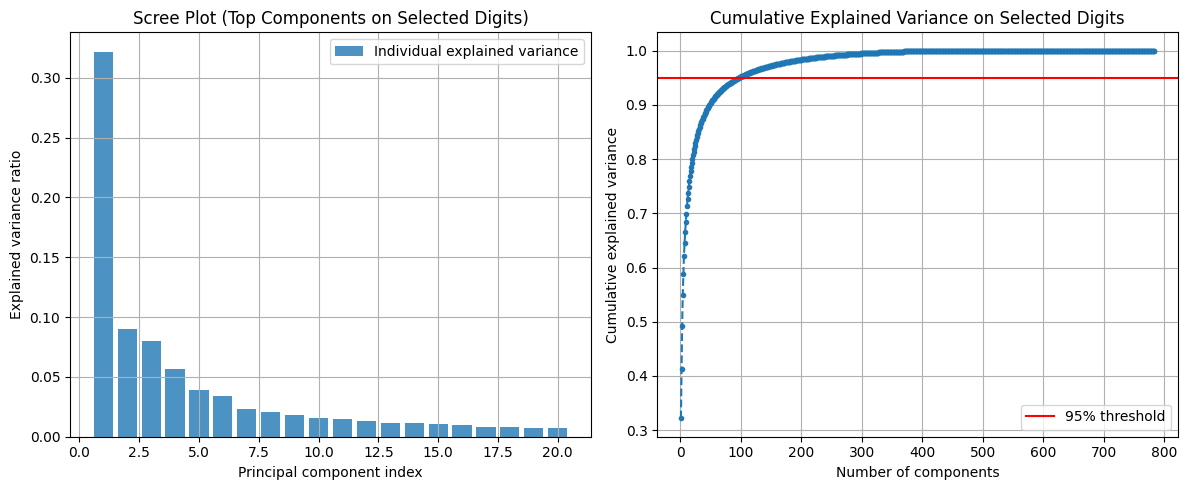

데이터 분산의 95%를 설명하는 데 필요한 주성분 개수: 97


In [42]:
# 공분산 행렬 및 고유값 분해
cov_matrix_mnist = np.cov(X_centered_mnist.T)
eigenvalues_mnist, eigenvectors_mnist = np.linalg.eigh(cov_matrix_mnist)

# 고유값/고유벡터 정렬 (내림차순)
sort_indices_mnist = np.argsort(eigenvalues_mnist)[::-1]
eigenvalues_mnist = eigenvalues_mnist[sort_indices_mnist]
eigenvectors_mnist = eigenvectors_mnist[:, sort_indices_mnist]

# 분산 설명량 계산
explained_variance_ratio = eigenvalues_mnist / np.sum(eigenvalues_mnist)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# 시각화할 주성분 개수를 데이터 차원 수와 20 중 작은 값으로 제한
num_components_to_plot = min(20, X_centered_mnist.shape[1])
plt.bar(range(1, num_components_to_plot + 1), explained_variance_ratio[:num_components_to_plot], alpha=0.8, label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot (Top Components on Selected Digits)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='.', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% threshold')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance on Selected Digits')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 95% 분산을 설명하는 데 필요한 주성분 개수 확인
# np.argmax는 조건이 처음 True가 되는 인덱스를 반환합니다.
# 누적 분산이 없는 경우(데이터가 1개뿐인 등)를 대비하여 기본값 설정
if len(cumulative_explained_variance) > 0:
    n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
    print(f"데이터 분산의 95%를 설명하는 데 필요한 주성분 개수: {n_components_95}")
else:
    print("분산 설명량을 계산할 수 없습니다.")

#### 4.2.3. 저차원 임베딩 시각화
784차원의 이미지 데이터를 **가장 중요한 두 개의 주성분(PC1, PC2)**만 사용하여 2차원으로 축소하고, 그 결과를 산점도로 시각화합니다.
PCA는 레이블 정보 없이(Unsupervised) 오직 데이터의 분산만을 기반으로 동작했음에도, 서로 다른 숫자들을 어느 정도 군집화하는 경향을 보여줍니다.

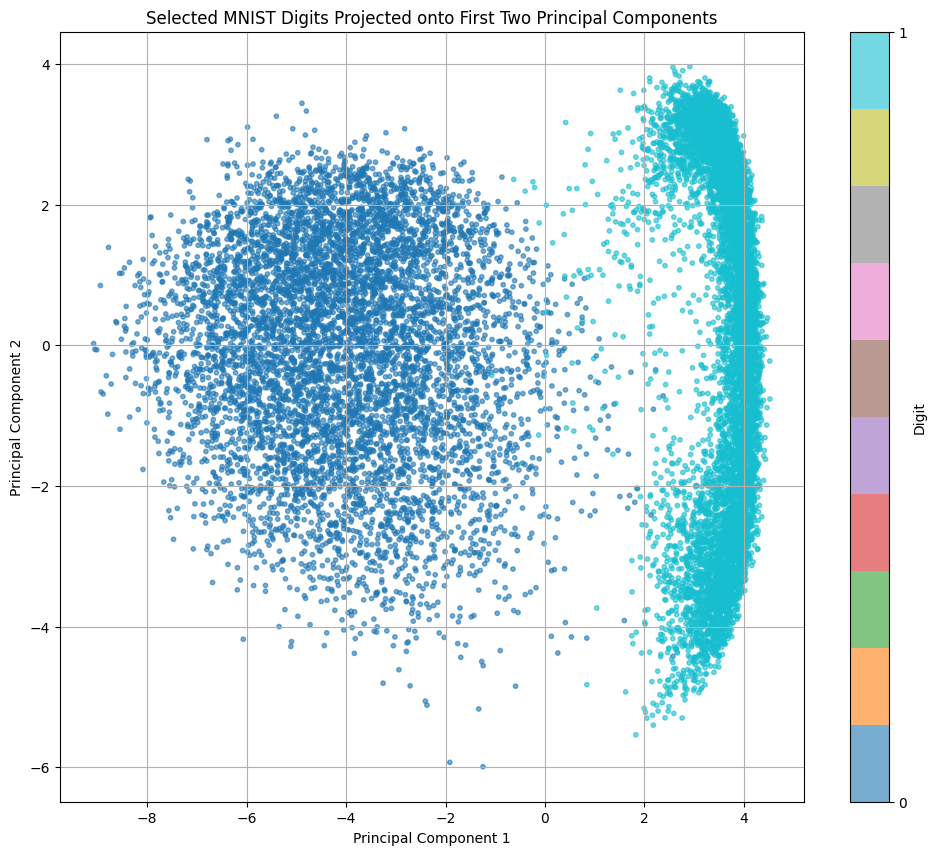

In [43]:
# PC1, PC2 추출
pc1_mnist = eigenvectors_mnist[:, 0]
pc2_mnist = eigenvectors_mnist[:, 1]

# 2차원으로 사영
projected_mnist = np.c_[X_centered_mnist @ pc1_mnist, X_centered_mnist @ pc2_mnist]

# 시각화
plt.figure(figsize=(12, 10))
# cmap='tab10'은 10개의 클래스를 구분하기 좋은 컬러맵입니다.
scatter = plt.scatter(projected_mnist[:, 0], projected_mnist[:, 1], c=y_mnist, cmap=plt.get_cmap("tab10", 10), alpha=0.6, s=10)
plt.title("Selected MNIST Digits Projected onto First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# 컬러바를 추가하여 각 색상이 어떤 숫자를 나타내는지 표시합니다.
# 선택된 숫자에 대해서만 눈금을 표시합니다.
cbar = plt.colorbar(scatter, ticks=selected_digits)
cbar.set_label('Digit')
plt.grid(True)
plt.show()

#### 4.2.4. 이미지 재구성을 통한 차원 축소 확인
주성분의 개수(`k`)를 다르게 하여 원본 이미지를 재구성해봅니다.
적은 수의 주성분만으로도 원본 이미지의 특징이 대부분 복원되는 것을 통해, PCA가 데이터의 핵심 정보를 소수의 차원에 압축하는 효과적인 도구임을 이해할 수 있습니다.

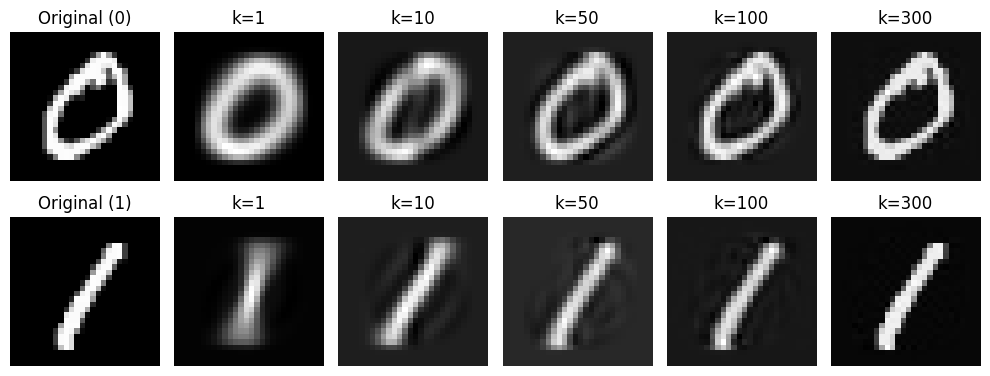

In [44]:
# 실습: k_values 리스트의 값을 바꿔보며(예: 200, 300 추가), 몇 개의 주성분으로 이미지가 거의 완벽하게 복원되는지 확인해보세요.
def reconstruct_image(data, eigenvectors, k):
    # k개의 주성분 선택
    top_k_pcs = eigenvectors[:, :k]
    # 데이터를 k차원으로 사영 (압축)
    projected_data = data @ top_k_pcs
    # k차원 데이터로부터 원본 차원으로 재구성 (압축 해제)
    reconstructed_data = projected_data @ top_k_pcs.T
    return reconstructed_data

# 원본 이미지와 비교할 다양한 숫자 샘플 선택
# 선택된 각 숫자별로 첫 번째 이미지 인덱스를 찾습니다.
sample_indices = []
if len(X_mnist) > 0:
    for digit in selected_digits:
        # np.where는 튜플을 반환하므로 [0][0]으로 인덱스를 추출합니다.
        # 해당 숫자가 데이터에 없을 경우를 대비하여 예외 처리를 합니다.
        try:
            sample_indices.append(np.where(y_mnist == digit)[0][0])
        except IndexError:
            print(f"경고: 데이터셋에 숫자 {digit}이(가) 없어 재구성 예시에서 제외됩니다.")

    sample_images = X_centered_mnist[sample_indices]
    original_images_to_show = X_mnist[sample_indices]

    k_values = [1, 10, 50, 100, 300]
    num_k = len(k_values)
    num_samples_to_show = len(sample_indices)

    if num_samples_to_show > 0:
        fig, axes = plt.subplots(num_samples_to_show, num_k + 1, figsize=(num_k * 2, num_samples_to_show * 2))

        # 단일 샘플일 경우 axes가 1D 배열이 되므로 2D로 만듭니다.
        if num_samples_to_show == 1:
            axes = axes.reshape(1, -1)

        for i, img_idx in enumerate(sample_indices):
            # 원본 이미지 표시
            axes[i, 0].imshow(original_images_to_show[i].reshape(28, 28), cmap='gray')
            axes[i, 0].set_title(f"Original ({y_mnist[img_idx]})")
            axes[i, 0].axis('off')

            # 재구성된 이미지 표시
            for j, k in enumerate(k_values):
                # k가 데이터 차원보다 크면 안됩니다.
                if k > X_centered_mnist.shape[1]:
                    axes[i, j + 1].set_title(f"k={k} (N/A)")
                    axes[i, j + 1].axis('off')
                    continue
                    
                reconstructed = reconstruct_image(X_centered_mnist, eigenvectors_mnist, k)
                reconstructed_img = reconstructed[img_idx] + np.mean(X_mnist, axis=0)
                axes[i, j + 1].imshow(reconstructed_img.reshape(28, 28), cmap='gray')
                axes[i, j + 1].set_title(f"k={k}")
                axes[i, j + 1].axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print("재구성할 이미지를 찾을 수 없습니다.")

else:
    print("데이터가 없어 이미지 재구성을 건너뜁니다.") 